In [137]:
from data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Loading

In [138]:
DATA_PATH = '../output_data/'
strong_scaling_path = DATA_PATH + 'Strong Scaling/'
weak_scaling_path = DATA_PATH + 'Weak Scaling/'
filecodes = list(range(4,100,4))

image_sizes = ('512x512', '4096x4096')

In [139]:
dhs_strong = {
    'mpi': {
        "512x512": [
            DataHandler(f'{strong_scaling_path}MPI/512x512/{file}') for file in os.listdir(strong_scaling_path + 'MPI/512x512/') if file.endswith('.log')
        ],
        "4096x4096": [
            DataHandler(f'{strong_scaling_path}MPI/4096x4096/{file}') for file in os.listdir(strong_scaling_path + 'MPI/4096x4096/') if file.endswith('.log')
        ],
    },
    'omp': {
        "512x512": [
            DataHandler(f'{strong_scaling_path}OMP/512x512/{file}') for file in os.listdir(strong_scaling_path + 'OMP/512x512/') if file.endswith('.log')
        ],
        "4096x4096": [
            DataHandler(f'{strong_scaling_path}OMP/4096x4096/{file}') for file in os.listdir(strong_scaling_path + 'OMP/4096x4096/') if file.endswith('.log')
        ],
    },
}

# Sort by duration
dhs_strong['mpi']['512x512'].sort(key=lambda x: x.duration(), reverse=True)
dhs_strong['mpi']['4096x4096'].sort(key=lambda x: x.duration(), reverse=True)
dhs_strong['omp']['512x512'].sort(key=lambda x: x.duration(), reverse=True)
dhs_strong['omp']['4096x4096'].sort(key=lambda x: x.duration(), reverse=True)

In [140]:
amdal_time = lambda p, n, t_prev: t_prev * ( (1-p) + p/n)

## Strong scaling

### MPI

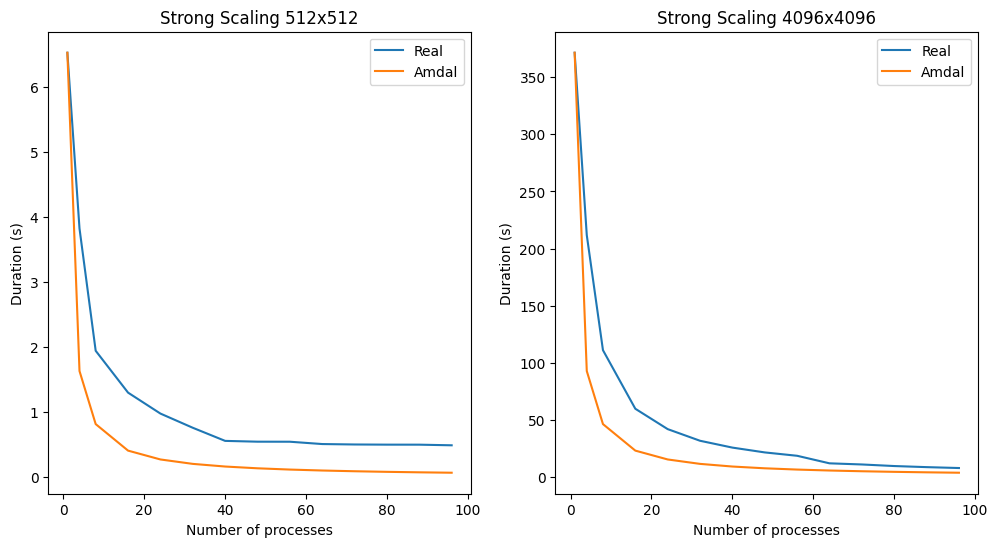

In [141]:
x = [1,4] + list(range(8,104,8))
x = np.array(x)

y_512_real = np.array([ dhs_strong['mpi']['512x512'][i].duration() for i in range(len(dhs_strong['mpi']['512x512'])) ])
y_512_amdal = np.array([ amdal_time(1, n, dhs_strong['mpi']['512x512'][0].duration()) for n in x ])
y_4096_real = np.array([ dhs_strong['mpi']['4096x4096'][i].duration() for i in range(len(dhs_strong['mpi']['4096x4096'])) ])
y_4096_amdal = np.array([ amdal_time(1, n, dhs_strong['mpi']['4096x4096'][0].duration()) for n in x ])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, y_512_real, label='Real')
ax[0].plot(x, y_512_amdal, label='Amdal')
ax[0].set_title('Strong Scaling 512x512')
ax[0].set_xlabel('Number of processes')
ax[0].set_ylabel('Duration (s)')
ax[0].legend()
ax[1].plot(x, y_4096_real, label='Real')
ax[1].plot(x, y_4096_amdal, label='Amdal')
ax[1].set_title('Strong Scaling 4096x4096')
ax[1].set_xlabel('Number of processes')
ax[1].set_ylabel('Duration (s)')
ax[1].legend()
plt.show()

### OMP

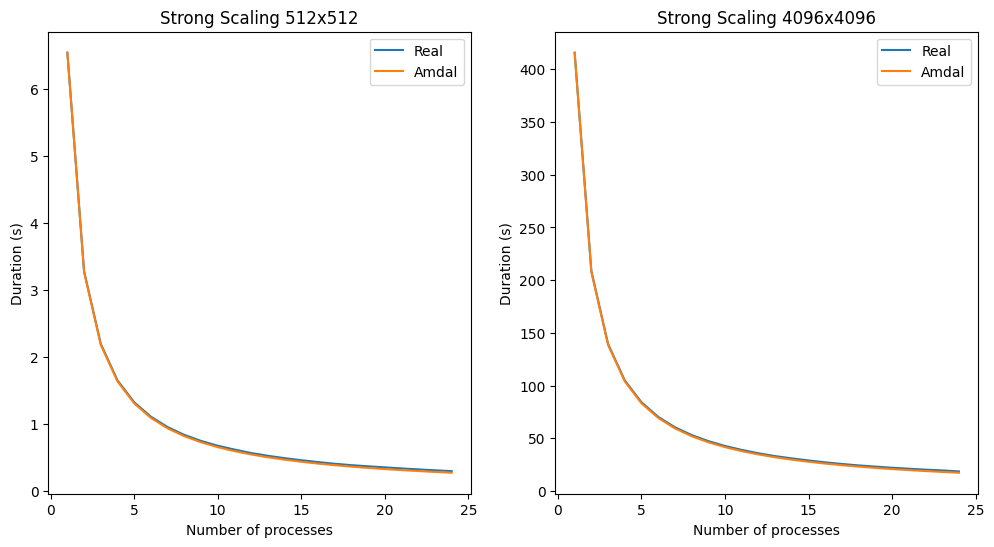

In [142]:
x = np.arange(1,25)

y_512_real = np.array([ dhs_strong['omp']['512x512'][i].duration() for i in range(len(dhs_strong['omp']['512x512'])) ])
y_512_amdal = np.array([ amdal_time(1, n, dhs_strong['omp']['512x512'][0].duration()) for n in x ])
y_4096_real = np.array([ dhs_strong['omp']['4096x4096'][i].duration() for i in range(len(dhs_strong['omp']['4096x4096'])) ])
y_4096_amdal = np.array([ amdal_time(1, n, dhs_strong['omp']['4096x4096'][0].duration()) for n in x ])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, y_512_real, label='Real')
ax[0].plot(x, y_512_amdal, label='Amdal')
ax[0].set_title('Strong Scaling 512x512')
ax[0].set_xlabel('Number of processes')
ax[0].set_ylabel('Duration (s)')
ax[0].legend()
ax[1].plot(x, y_4096_real, label='Real')
ax[1].plot(x, y_4096_amdal, label='Amdal')
ax[1].set_title('Strong Scaling 4096x4096')
ax[1].set_xlabel('Number of processes')
ax[1].set_ylabel('Duration (s)')
ax[1].legend()
plt.show()

## Weak scaling

In [143]:
dhs_weak = {
    'mpi': {
        "512x512": [
            DataHandler(f'{weak_scaling_path}MPI/512x512/{file}') for file in os.listdir(weak_scaling_path + 'MPI/512x512/') if file.endswith('.log')
        ],
        "4096x4096": [
            DataHandler(f'{weak_scaling_path}MPI/4096x4096/{file}') for file in os.listdir(weak_scaling_path + 'MPI/4096x4096/') if file.endswith('.log')
        ],
    },
    'omp': {
        "512x512": [
            DataHandler(f'{weak_scaling_path}OMP/512x512/{file}') for file in os.listdir(weak_scaling_path + 'OMP/512x512/') if file.endswith('.log')
        ],
        "4096x4096": [
            DataHandler(f'{weak_scaling_path}OMP/4096x4096/{file}') for file in os.listdir(weak_scaling_path + 'OMP/4096x4096/') if file.endswith('.log')
        ],
    },
}

# Sort by duration
dhs_weak['mpi']['512x512'].sort(key=lambda x: x.width)
dhs_weak['mpi']['4096x4096'].sort(key=lambda x: x.width)
dhs_weak['omp']['512x512'].sort(key=lambda x: x.width)
dhs_weak['omp']['4096x4096'].sort(key=lambda x: x.width)

### MPI

In [144]:
x = np.arange(4,100,4)
y_512_real = np.array([ dhs_weak['mpi']['512x512'][i].duration() for i in range(len(dhs_weak['mpi']['512x512'])) ])
y_512_theory = np.ones(len(y_512_real)) * y_512_real[0]
y_4096_real = np.array([ dhs_weak['mpi']['4096x4096'][i].duration() for i in range(len(dhs_weak['mpi']['4096x4096'])) ])
y_4096_theory = np.ones(len(y_4096_real)) * y_4096_real[0]

In [145]:
from sklearn.linear_model import LinearRegression

linreg_512 = LinearRegression().fit(x.reshape(-1,1), y_512_real)
linreg_4096 = LinearRegression().fit(x.reshape(-1,1), y_4096_real)

slope_512, intercept_512 = linreg_512.coef_[0]*1e3, linreg_512.intercept_
slope_4096, intercept_4096 = linreg_4096.coef_[0]*1e3, linreg_4096.intercept_
print(f'512x512: {slope_512:.2f} ms/px, {intercept_512} us')
print(f'4096x4096: {slope_4096:.2f} ms/px, {intercept_4096} us')

y_pred_512 = linreg_512.predict(x.reshape(-1,1))
y_pred_4096 = linreg_4096.predict(x.reshape(-1,1))

512x512: -20.72 ms/px, 4.832171815217392 us
4096x4096: -260.56 ms/px, 262.4805814202898 us


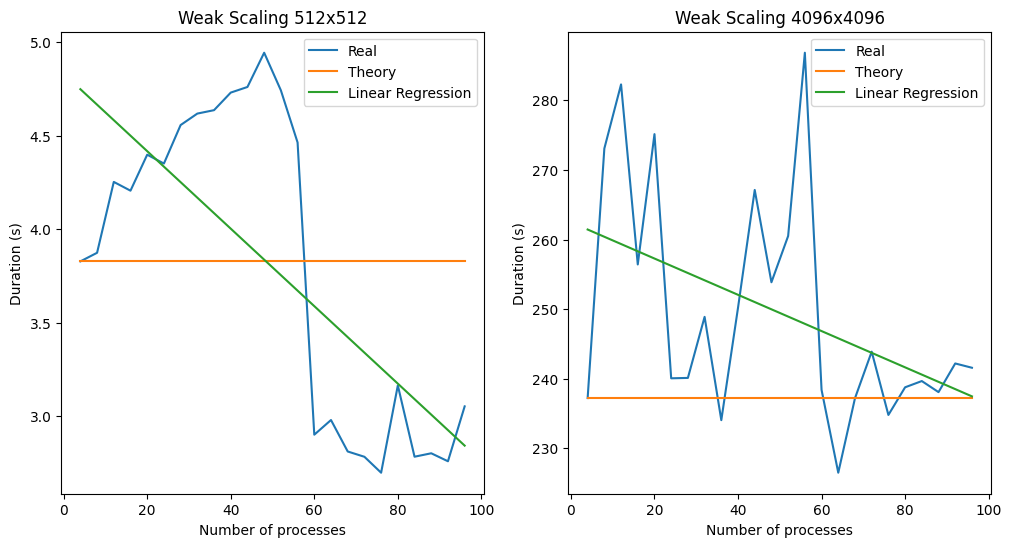

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, y_512_real, label='Real')
ax[0].plot(x, y_512_theory, label='Theory')
ax[0].plot(x, y_pred_512, label='Linear Regression')
ax[0].set_title('Weak Scaling 512x512')
ax[0].set_xlabel('Number of processes')
ax[0].set_ylabel('Duration (s)')
ax[0].legend()
ax[1].plot(x, y_4096_real, label='Real')
ax[1].plot(x, y_4096_theory, label='Theory')
ax[1].plot(x, y_pred_4096, label='Linear Regression')
ax[1].set_title('Weak Scaling 4096x4096')
ax[1].set_xlabel('Number of processes')
ax[1].set_ylabel('Duration (s)')
ax[1].legend()
plt.show()

### OMP

In [147]:
x = np.arange(1,25,1)
y_512_real = np.array([ dhs_weak['omp']['512x512'][i].duration() for i in range(len(dhs_weak['omp']['512x512'])) ])
y_512_theory = np.ones(len(y_512_real)) * y_512_real[0]
y_4096_real = np.array([ dhs_weak['omp']['4096x4096'][i].duration() for i in range(len(dhs_weak['omp']['4096x4096'])) ])
y_4096_theory = np.ones(len(y_4096_real)) * y_4096_real[0]

In [148]:
from sklearn.linear_model import LinearRegression

linreg_512 = LinearRegression().fit(x.reshape(-1,1), y_512_real)
linreg_4096 = LinearRegression().fit(x.reshape(-1,1), y_4096_real)

slope_512, intercept_512 = linreg_512.coef_[0]*1e3, linreg_512.intercept_
slope_4096, intercept_4096 = linreg_4096.coef_[0]*1e3, linreg_4096.intercept_
print(f'512x512: {slope_512:.2f} ms/px, {intercept_512} us')
print(f'4096x4096: {slope_4096:.2f} ms/px, {intercept_4096} us')

y_pred_512 = linreg_512.predict(x.reshape(-1,1))
y_pred_4096 = linreg_4096.predict(x.reshape(-1,1))

512x512: 19.24 ms/px, 6.484712688405796 us
4096x4096: 820.12 ms/px, 414.72411371376813 us


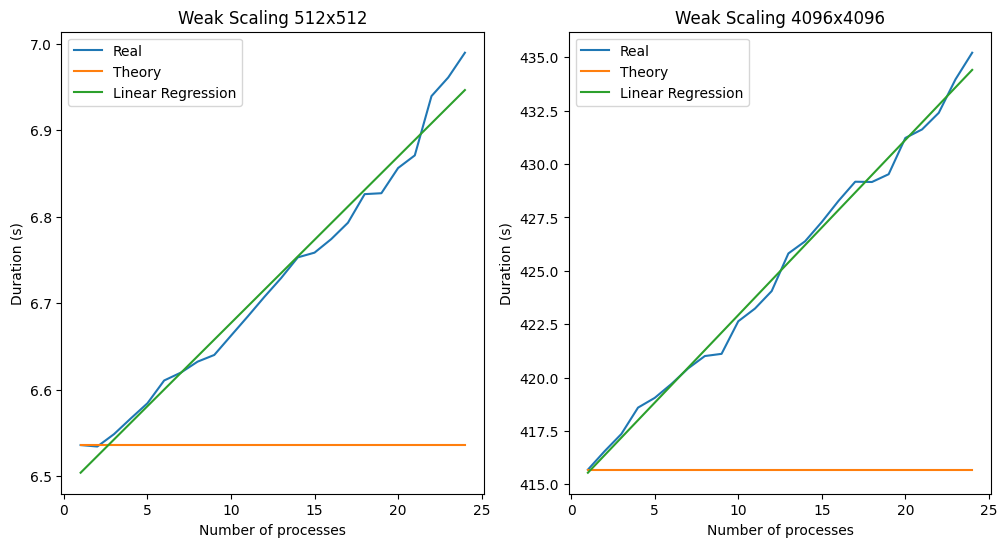

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, y_512_real, label='Real')
ax[0].plot(x, y_512_theory, label='Theory')
ax[0].plot(x, y_pred_512, label='Linear Regression')
ax[0].set_title('Weak Scaling 512x512')
ax[0].set_xlabel('Number of processes')
ax[0].set_ylabel('Duration (s)')
ax[0].legend()
ax[1].plot(x, y_4096_real, label='Real')
ax[1].plot(x, y_4096_theory, label='Theory')
ax[1].plot(x, y_pred_4096, label='Linear Regression')
ax[1].set_title('Weak Scaling 4096x4096')
ax[1].set_xlabel('Number of processes')
ax[1].set_ylabel('Duration (s)')
ax[1].legend()
plt.show()